In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import numpy as np

train_df = pd.read_pickle("../data/train_cens.pkl.gz")
train_df.head()

,name,parent,cens_slice,index
0,XC109605,acafly,"[[0.3086012466109237, 0.30568218743577036, 0.3...","(25, 75)"
0,XC109605,acafly,"[[0.37812375487169103, 0.3725999263434882, 0.3...","(157, 207)"
0,XC109605,acafly,"[[0.38193222855739883, 0.3810666924182529, 0.3...","(260, 310)"
0,XC109605,acafly,"[[0.3523993330368658, 0.3480284909351147, 0.34...","(324, 374)"
0,XC109605,acafly,"[[0.3179275282653602, 0.3194400852268083, 0.32...","(361, 411)"


In [2]:
import tensorflow as tf

def reshape_square(arr, k=25):
    """Domain specific. Transform 12x50 matrix into a square matrix that's 25x25."""
    x = np.zeros(k*k)
    a = arr.reshape(-1)
    x[:a.shape[0]] = a
    return x.reshape(k, k, 1)
    
X = np.stack(train_df.cens_slice.apply(reshape_square))

lb = LabelBinarizer()
lb.fit(train_df.parent)
y = lb.transform(train_df.parent)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Softmax, Flatten, Dense
from tensorflow_addons.metrics import F1Score

tf.config.list_physical_devices('GPU')
def get_compiled_model(input_shape=(25, 25, 1), output_shape=397):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(output_shape, activation='sigmoid'))
    
    model.compile(optimizer='adam',
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=['accuracy', F1Score(num_classes=output_shape)])
    return model

In [19]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(128)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(128)

In [20]:
model = get_compiled_model()
history = model.fit(train_dataset, epochs=50, validation_data=test_dataset)

Epoch 1/50
3450/3450 [==============================] - 48s 14ms/step - loss: 0.0275 - accuracy: 0.0185 - f1_score: 0.0024 - val_loss: 0.0163 - val_accuracy: 0.0377 - val_f1_score: 0.0080
Epoch 2/50
3450/3450 [==============================] - 46s 13ms/step - loss: 0.0162 - accuracy: 0.0412 - f1_score: 0.0120 - val_loss: 0.0159 - val_accuracy: 0.0500 - val_f1_score: 0.0174
Epoch 3/50
3450/3450 [==============================] - 46s 13ms/step - loss: 0.0158 - accuracy: 0.0556 - f1_score: 0.0226 - val_loss: 0.0157 - val_accuracy: 0.0597 - val_f1_score: 0.0279
Epoch 4/50
3450/3450 [==============================] - 46s 13ms/step - loss: 0.0155 - accuracy: 0.0663 - f1_score: 0.0339 - val_loss: 0.0155 - val_accuracy: 0.0649 - val_f1_score: 0.0348
Epoch 5/50
3450/3450 [==============================] - 46s 13ms/step - loss: 0.0153 - accuracy: 0.0752 - f1_score: 0.0436 - val_loss: 0.0154 - val_accuracy: 0.0717 - val_f1_score: 0.0419
Epoch 6/50
3450/3450 [==============================] - 47s 

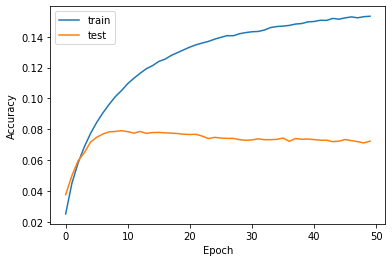

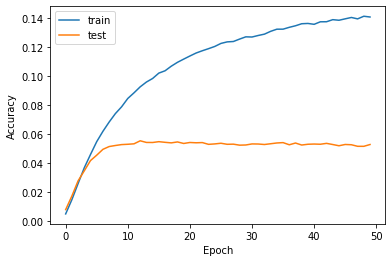

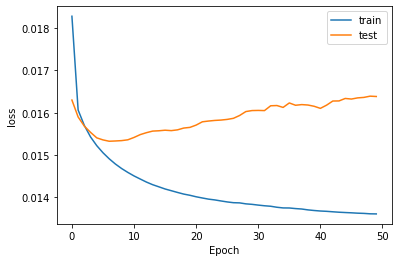

5914/5914 - 35s - loss: 0.0164 - accuracy: 0.0724 - f1_score: 0.0530


[0.016383647918701172,
 0.072394460439682,
 array([0.03953872, 0.03757828, 0.14094433, 0.01587302, 0.03930818,
        0.00914634, 0.        , 0.        , 0.04089582, 0.12139738,
        0.        , 0.03225806, 0.04568406, 0.03914591, 0.05073431,
        0.01344538, 0.0657277 , 0.        , 0.        , 0.045     ,
        0.0338681 , 0.        , 0.05090138, 0.17584862, 0.0037594 ,
        0.02996255, 0.03686636, 0.07804878, 0.01980198, 0.07325383,
        0.        , 0.01204819, 0.054     , 0.06094183, 0.02112676,
        0.02293578, 0.04859813, 0.03883495, 0.22456813, 0.01166181,
        0.06804734, 0.08557457, 0.04651163, 0.10218978, 0.        ,
        0.06983241, 0.07035176, 0.06216216, 0.03850051, 0.1406014 ,
        0.04576043, 0.02898551, 0.01550388, 0.00729927, 0.1495327 ,
        0.06137566, 0.00595238, 0.02649007, 0.06436782, 0.05517241,
        0.03291278, 0.21217391, 0.03478261, 0.        , 0.0508744 ,
        0.04402516, 0.04347826, 0.        , 0.04267843, 0.00724638,
     

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot([x.mean() for x in history.history['f1_score']], label='train')
plt.plot([x.mean() for x in history.history['val_f1_score']], label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend()
plt.show()


model.evaluate(X_test, y_test, verbose=2)